## Importing Data

In [1]:
import pandas as pd
import numpy as np

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print(train.head(5))
print("##############################################")
print(test.head(5))

train.Arrhythmia.unique()

   Amplitude        RR     Speed  Age Sex Medicine Arrhythmia
0   0.915824  1.841667  0.497280   24   F      Yes         (B
1   0.794527  1.541667  0.515369   24   F      Yes         (B
2   0.764521  1.377778  0.554894   24   F      Yes         (B
3   1.039003  1.591667  0.652777   24   F      Yes         (B
4   2.003128  1.563889  1.280863   24   F      Yes         (B
##############################################
   Amplitude        RR     Speed  Age Sex Medicine Arrhythmia
0   1.169131  1.975000  0.591965   51   F      Yes         (B
1   1.524159  1.844444  0.826351   51   F      Yes         (B
2   1.378575  1.869444  0.737425   51   F      Yes         (B
3   1.191273  1.952778  0.610040   51   F      Yes         (B
4   1.238591  1.850000  0.669508   51   F      Yes         (B


array(['(B', '(N', '(VT', '(T'], dtype=object)

In [2]:
train = pd.get_dummies(train, columns=['Sex'],drop_first=True)
train = pd.get_dummies(train, columns=['Medicine'],drop_first=True)
train['Age'] = train['Age']/100

test = pd.get_dummies(test, columns=['Sex'],drop_first=True)
test = pd.get_dummies(test, columns=['Medicine'],drop_first=True)
test['Age'] = test['Age']/100

In [3]:
print(train.head(5))
print("##############################################")
print(test.head(5))

   Amplitude        RR     Speed   Age Arrhythmia  Sex_M  Medicine_Yes
0   0.915824  1.841667  0.497280  0.24         (B      0             1
1   0.794527  1.541667  0.515369  0.24         (B      0             1
2   0.764521  1.377778  0.554894  0.24         (B      0             1
3   1.039003  1.591667  0.652777  0.24         (B      0             1
4   2.003128  1.563889  1.280863  0.24         (B      0             1
##############################################
   Amplitude        RR     Speed   Age Arrhythmia  Sex_M  Medicine_Yes
0   1.169131  1.975000  0.591965  0.51         (B      0             1
1   1.524159  1.844444  0.826351  0.51         (B      0             1
2   1.378575  1.869444  0.737425  0.51         (B      0             1
3   1.191273  1.952778  0.610040  0.51         (B      0             1
4   1.238591  1.850000  0.669508  0.51         (B      0             1


In [4]:
labels = list(set(train.Arrhythmia))
train['Arrhythmia'] = pd.DataFrame(train.Arrhythmia.map({x:labels.index(x) for x in labels}).rename('Disease'))
train.head()

,Amplitude,RR,Speed,Age,Arrhythmia,Sex_M,Medicine_Yes
0,0.915824,1.841667,0.497280,0.24,0,0,1
1,0.794527,1.541667,0.515369,0.24,0,0,1
2,0.764521,1.377778,0.554894,0.24,0,0,1
3,1.039003,1.591667,0.652777,0.24,0,0,1
4,2.003128,1.563889,1.280863,0.24,0,0,1


In [5]:
train.head()

,Amplitude,RR,Speed,Age,Arrhythmia,Sex_M,Medicine_Yes
0,0.915824,1.841667,0.497280,0.24,0,0,1
1,0.794527,1.541667,0.515369,0.24,0,0,1
2,0.764521,1.377778,0.554894,0.24,0,0,1
3,1.039003,1.591667,0.652777,0.24,0,0,1
4,2.003128,1.563889,1.280863,0.24,0,0,1


In [6]:
labels = list(set(test.Arrhythmia))
test['Arrhythmia'] = pd.DataFrame(test.Arrhythmia.map({x:labels.index(x) for x in labels}).rename('Disease'))
test.head()

,Amplitude,RR,Speed,Age,Arrhythmia,Sex_M,Medicine_Yes
0,1.169131,1.975000,0.591965,0.51,0,0,1
1,1.524159,1.844444,0.826351,0.51,0,0,1
2,1.378575,1.869444,0.737425,0.51,0,0,1
3,1.191273,1.952778,0.610040,0.51,0,0,1
4,1.238591,1.850000,0.669508,0.51,0,0,1


In [8]:
train = train.drop('Speed',axis=1)
test = test.drop('Speed',axis=1)
train.head()

,Amplitude,RR,Age,Arrhythmia,Sex_M,Medicine_Yes
0,0.915824,1.841667,0.24,0,0,1
1,0.794527,1.541667,0.24,0,0,1
2,0.764521,1.377778,0.24,0,0,1
3,1.039003,1.591667,0.24,0,0,1
4,2.003128,1.563889,0.24,0,0,1


## Training and Testing Variables

In [9]:
X_train = train.loc[:, train.columns != 'Arrhythmia']
X_test = test.loc[:, test.columns != 'Arrhythmia']

y_train = train['Arrhythmia']
y_test = test['Arrhythmia']

## Model and Evaluation

In [10]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

c:\Python\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:30:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 97.98%


In [11]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

model = SVC(kernel='poly')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

import pickle
pickle.dump(model, open('pipe.pkl','wb'))

Accuracy: 99.33%


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_estimators=10, criterion='entropy')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 98.92%


In [13]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=10)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 98.11%


In [15]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 60.73%


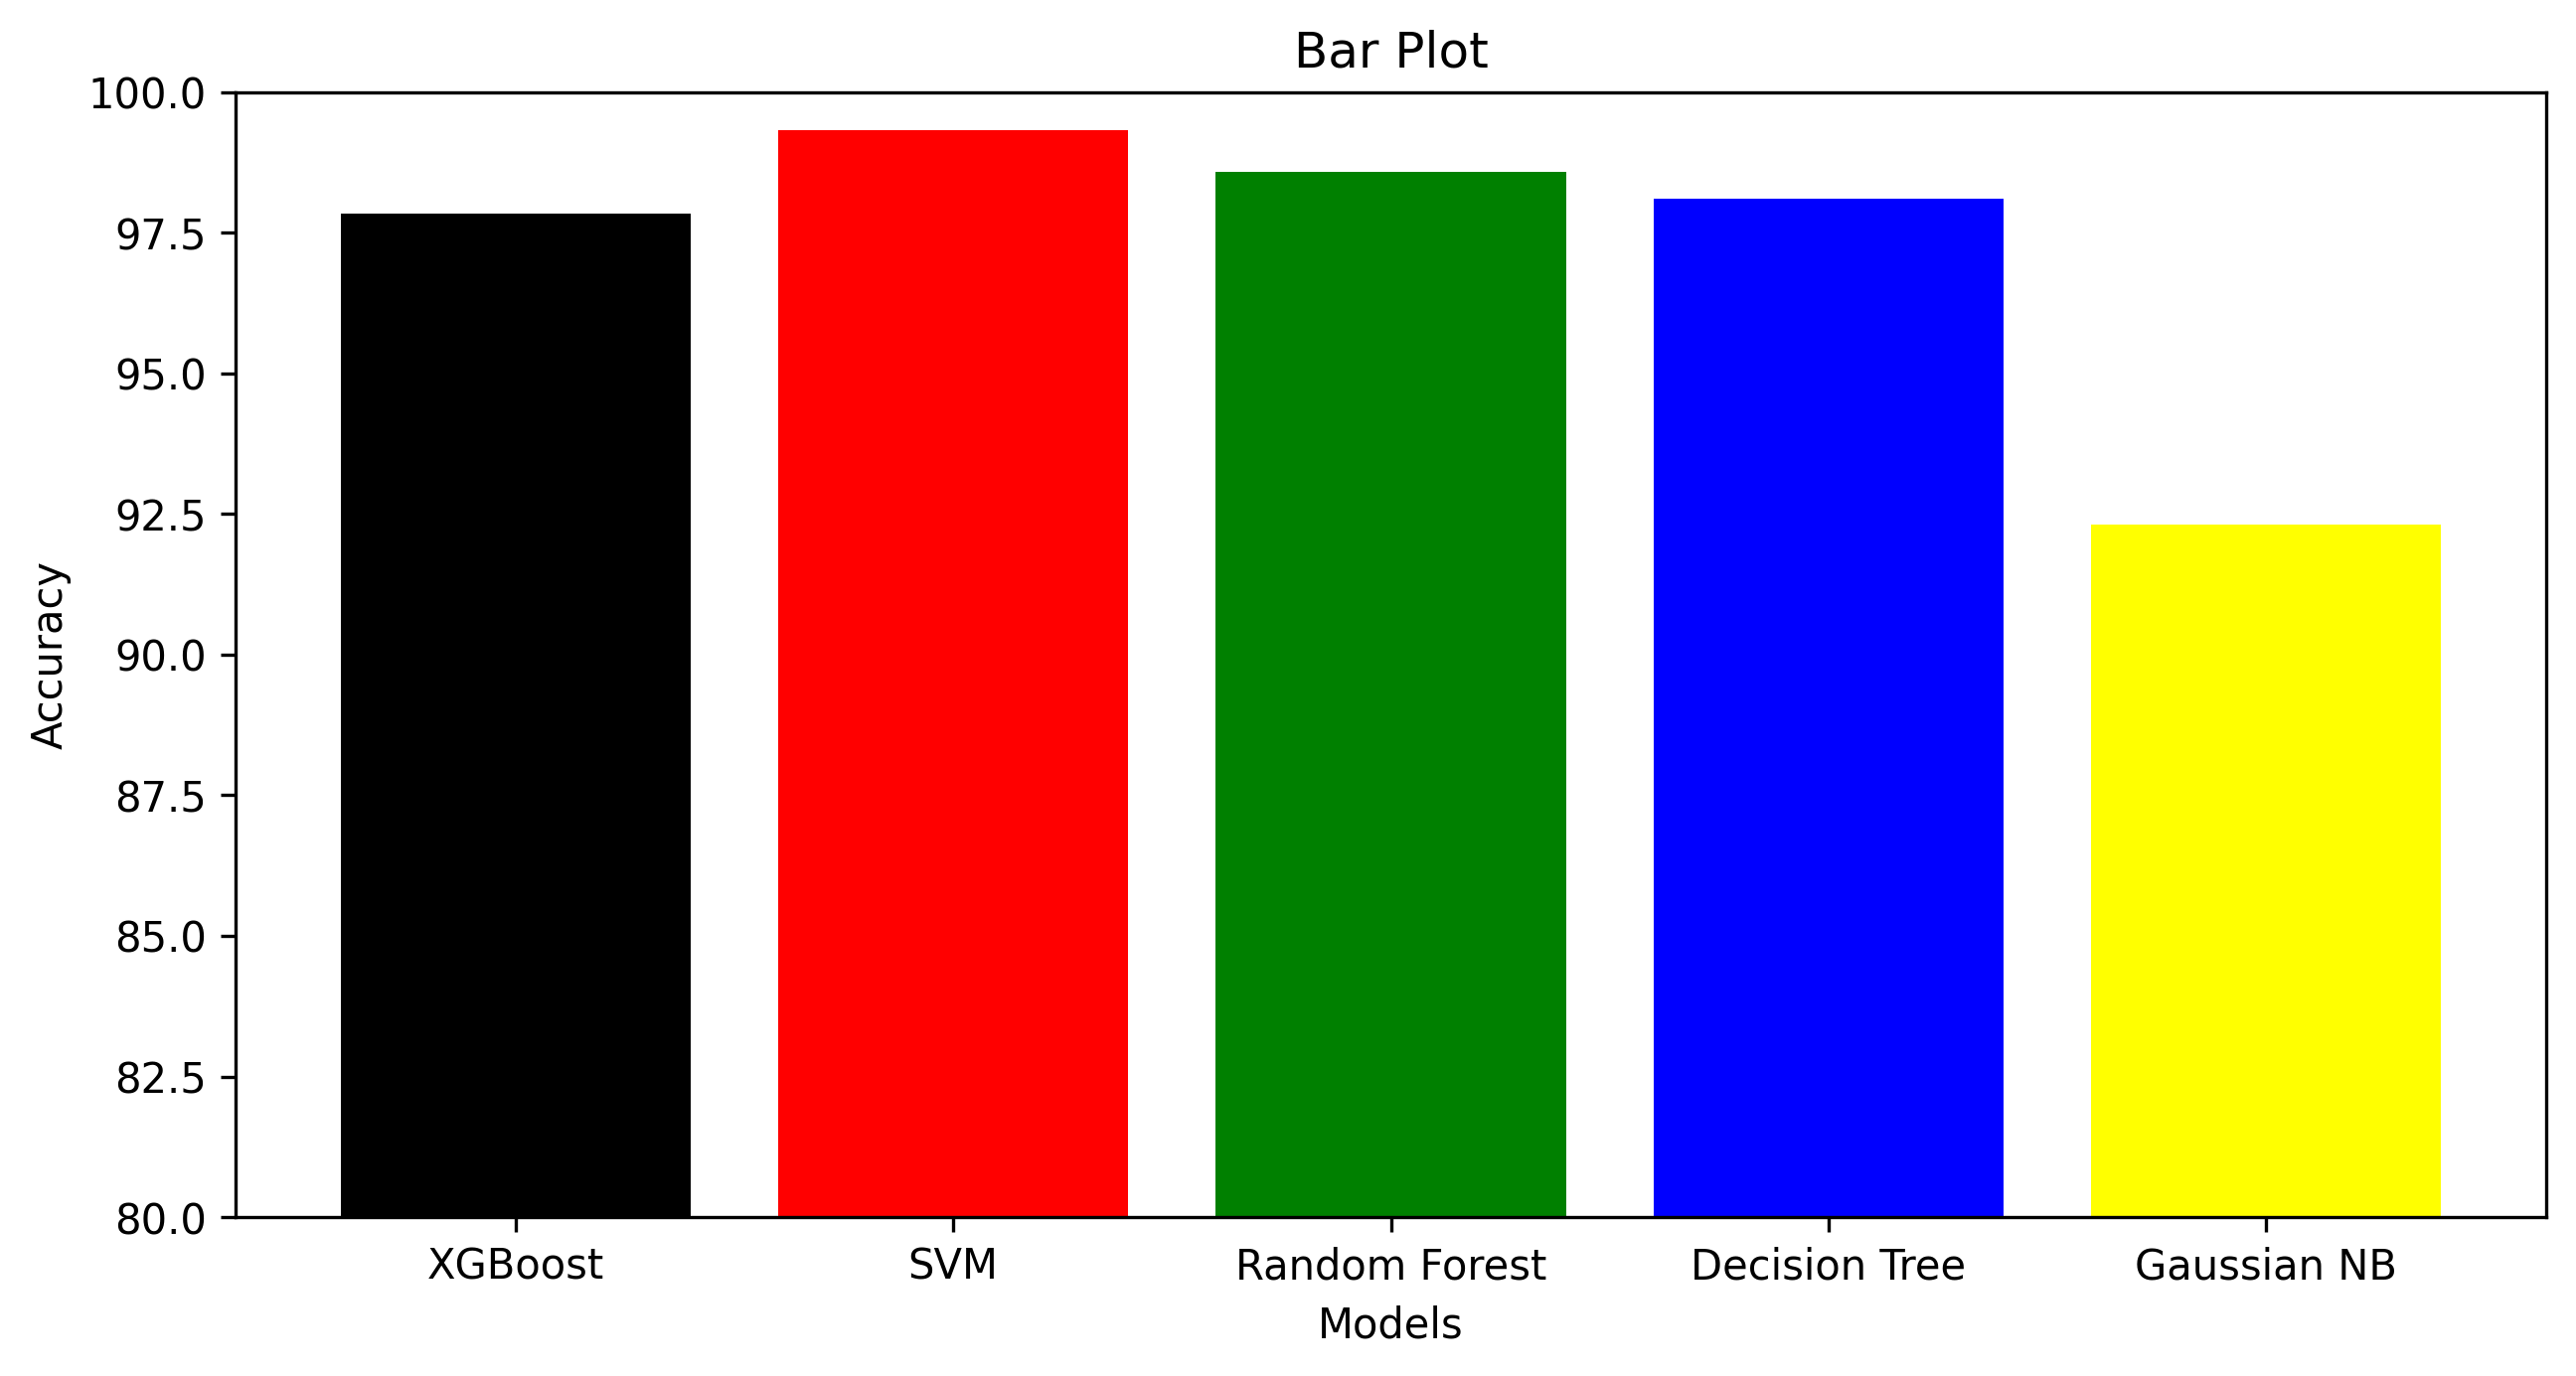

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':300})

x=['XGBoost','SVM','Random Forest','Decision Tree','Gaussian NB']
y = (97.84,99.33,98.59,98.11,92.31)

plt.bar(x,y,color=('black', 'red', 'green', 'blue', 'yellow'))
plt.ylim(bottom=80, top=100)
plt.xlabel('Models')
plt.ylabel("Accuracy")
plt.title('Bar Plot')
plt.show()